# Sharpened_Image = 1.5 x Input - 0.5 x G * Input (G - Gaussian)

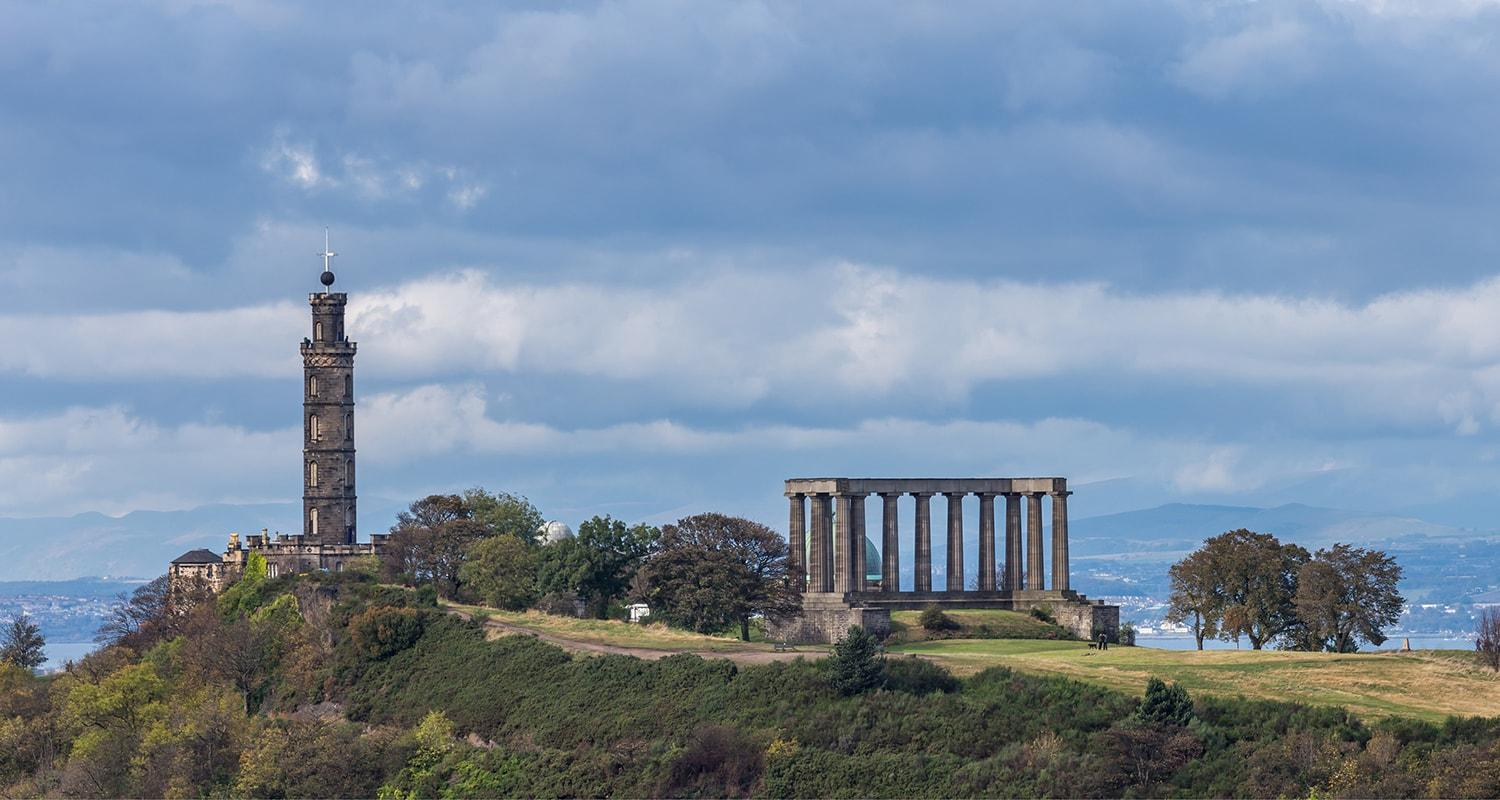

In [6]:
import numpy as np
from PIL import Image as image
from IPython.display import display, Image
from io import BytesIO

img = np.array(image.open('monument.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [7]:
def Gaussian(shape=(3, 3), sigma=1):
    m,n = [(s-1)/2 for s in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    gauss = 1/(2*np.pi*(sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    su = gauss.sum()
    if not su:
        gauss/=su
    return gauss

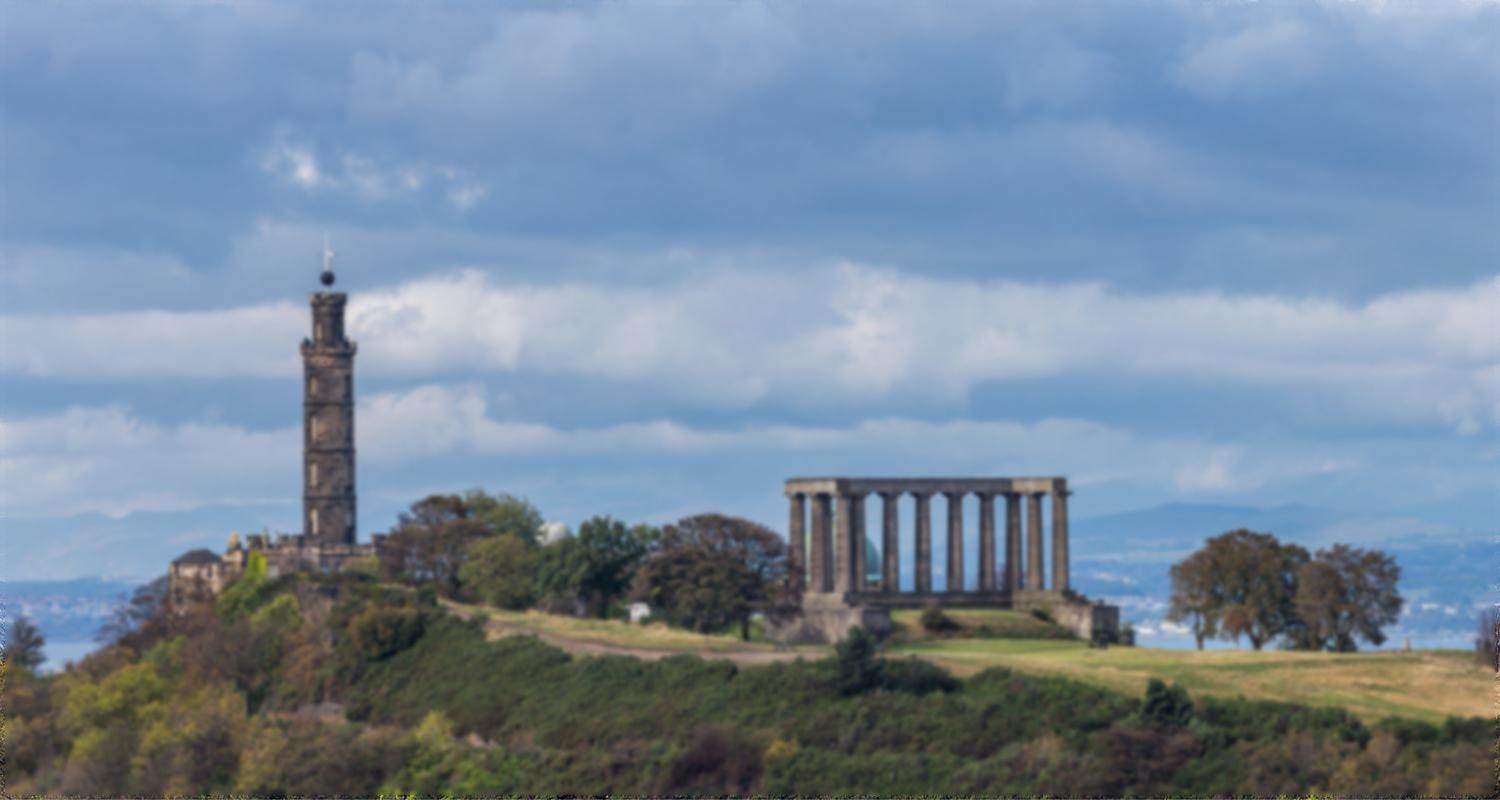

In [19]:
height, width, channels = img.shape
gauss = Gaussian(shape=(11, 11), sigma=2)
gaussian = np.array(image.open('monument.jpg'))

for i in range(5, height-5):
    for j in range(5, width-5):
        gaussian[i][j][0] = np.sum(np.multiply(img[i-5:i+6, j-5:j+6, 0], gauss))
        gaussian[i][j][1] = np.sum(np.multiply(img[i-5:i+6, j-5:j+6, 1], gauss))
        gaussian[i][j][2] = np.sum(np.multiply(img[i-5:i+6, j-5:j+6, 2], gauss))

f = BytesIO()
image.fromarray(gaussian.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

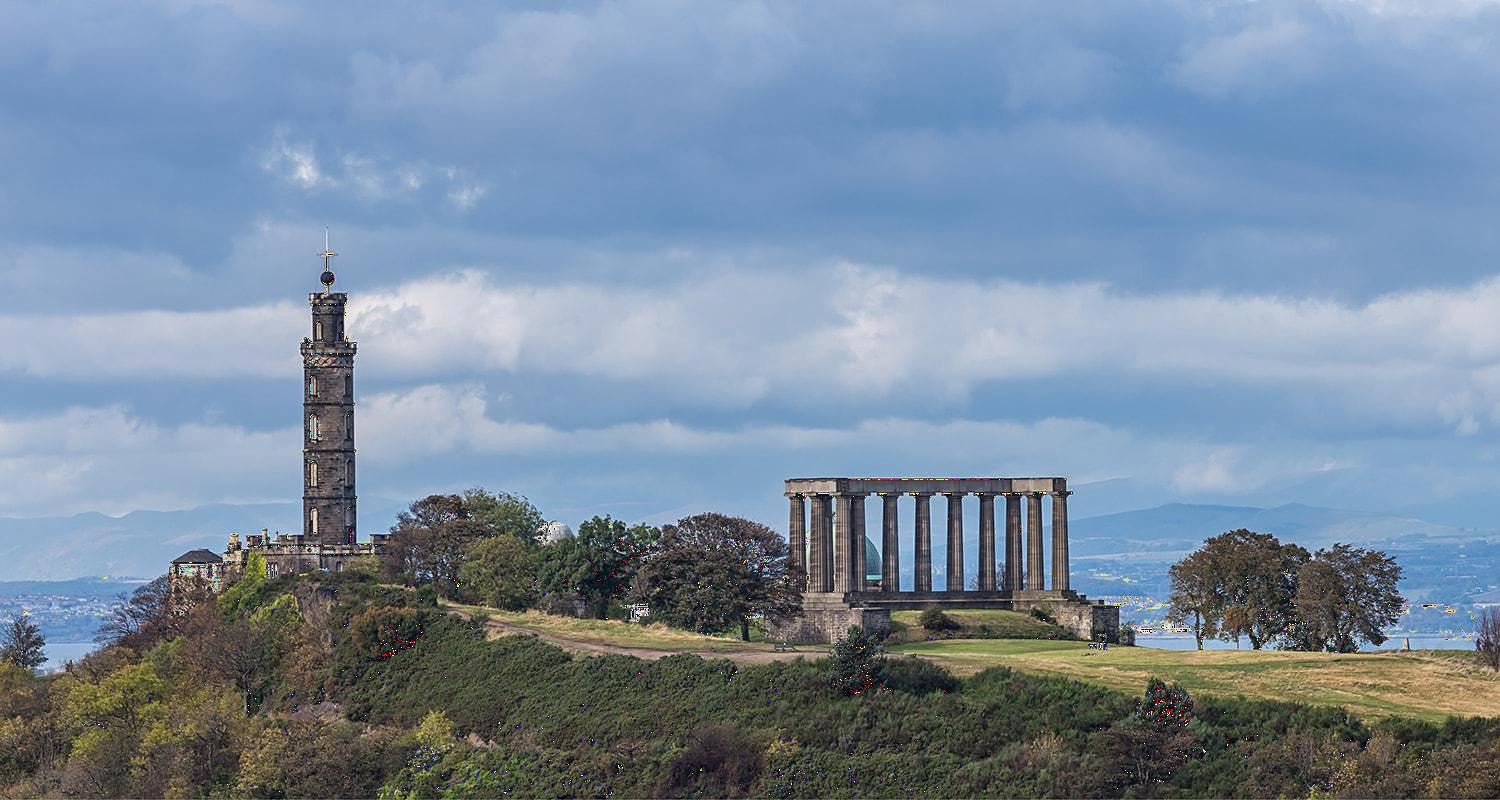

In [25]:
### Sharpening ###

sharpened_image = 1.3*img - 0.3*gaussian
f = BytesIO()
image.fromarray(sharpened_image.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

#  2nd Example

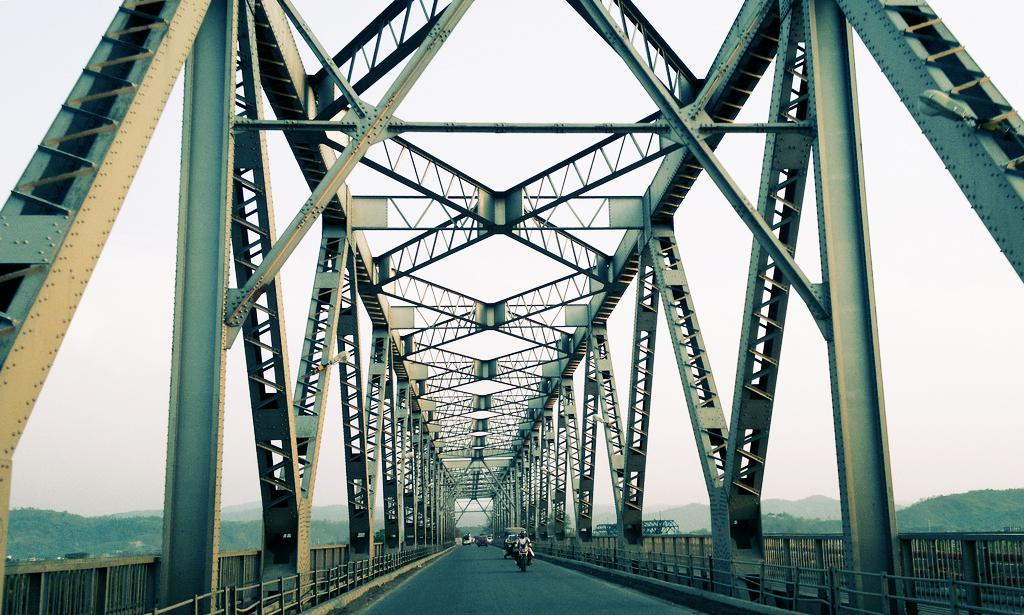

In [41]:
img = np.array(image.open('bridge.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

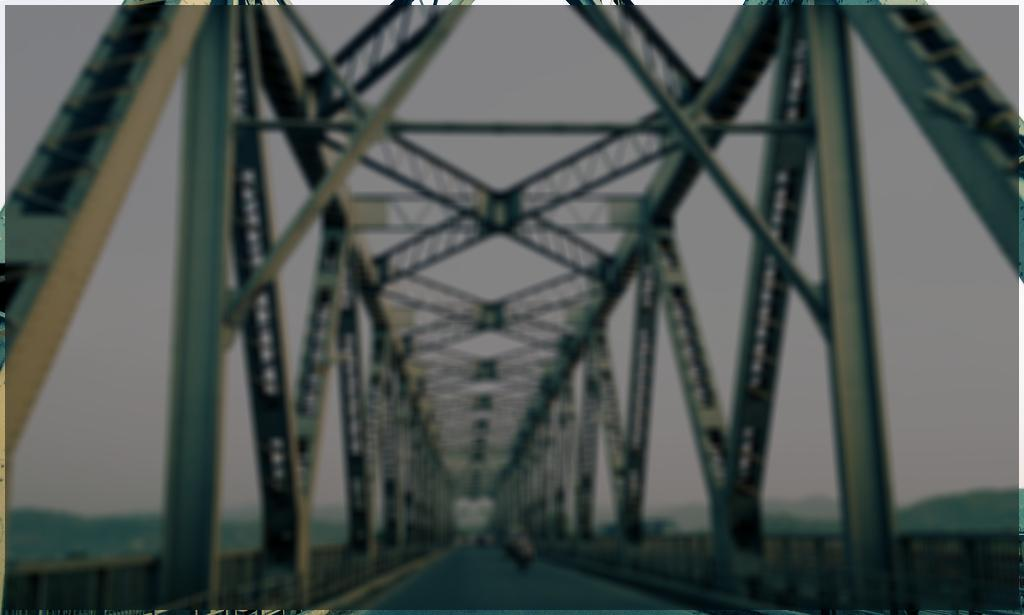

In [50]:
height, width, channels = img.shape
gauss = Gaussian(shape=(11, 11), sigma=5)
gaussian = np.array(image.open('bridge.jpg'))

for i in range(5, height-5):
    for j in range(5, width-5):
        gaussian[i][j][0] = np.sum(np.multiply(img[i-5:i+6, j-5:j+6, 0], gauss))
        gaussian[i][j][1] = np.sum(np.multiply(img[i-5:i+6, j-5:j+6, 1], gauss))
        gaussian[i][j][2] = np.sum(np.multiply(img[i-5:i+6, j-5:j+6, 2], gauss))

f = BytesIO()
image.fromarray(gaussian.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

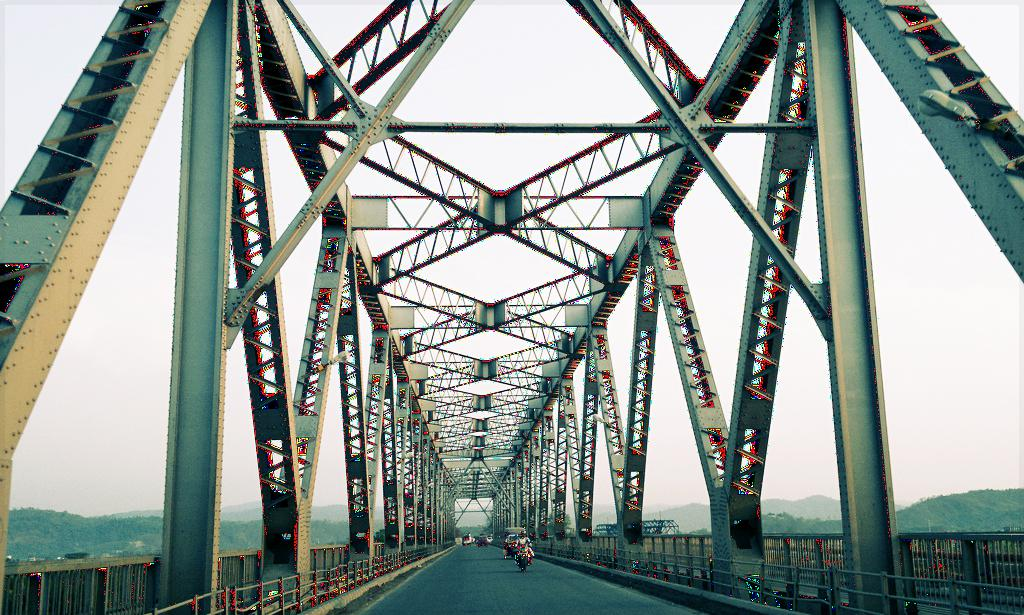

In [63]:
sharpened_image = 1.05*img - 0.09*gaussian
f = BytesIO()
image.fromarray(sharpened_image.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))